# ResNet 20/56 with/without Pre-Activation
Training settings:

epoch = 150

initialization = Kaiming nomral (fan-in mode)

optimzer = SGD

lr = 0.1 (decayed by 10 on epoch 75, 100)

momemtum = 0.9

weigh_decay = 1e-4

In [1]:
import cPickle as pickle
import matplotlib.pylab as pl
%matplotlib inline

In [2]:
progress = []
train_progress = []
train_epoch_progress = []
train_loss_progress = []
train_acc_progress = []
test_progress = []
test_epoch_progress = []
test_loss_progress = []
test_acc_progress = []
avg_epoch_time = []
total_train_time = []

progress.append(pickle.load(open('./resnet-20_progress_2017-07-31_02-01-20.pkl', 'rb')))
progress.append(pickle.load(open('./resnet-56_progress_2017-07-31_04-19-33.pkl', 'rb')))
progress.append(pickle.load(open('./resnetv2-20_progress_2017-07-30_22-28-59.pkl', 'rb')))
progress.append(pickle.load(open('./resnetv2-56_progress_2017-07-31_06-36-06.pkl', 'rb')))

for i in range(4):
    train_progress.append(zip(*progress[i]['train']))
    train_epoch_progress.append(list(train_progress[i][0]))
    train_loss_progress.append((train_progress[i][1]))
    train_acc_progress.append((train_progress[i][2]))

    test_progress.append(zip(*progress[i]['test']))
    test_epoch_progress.append(list(test_progress[i][0]))
    test_loss_progress.append(list(test_progress[i][1]))
    test_acc_progress.append(list(test_progress[i][2]))

    avg_epoch_time.append(progress[i]['train_time'][0])
    total_train_time.append(progress[i]['train_time'][1])

In [3]:
labels = ['ResNet-20', 'ResNet-56', 'ResNetV2-20', 'ResNetV2-56', 'VGG-16']
colors = ['r', 'g', 'b', 'y', 'r']

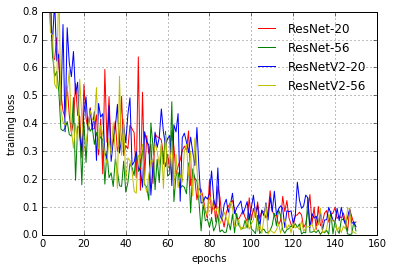

In [4]:
for i in range(4):
    pl.plot(train_epoch_progress[i], train_loss_progress[i], colors[i], label=labels[i])
pl.legend(framealpha=0, loc=0)
pl.grid()
pl.ylim(0, 0.8)
pl.xlabel('epochs')
pl.ylabel('training loss')

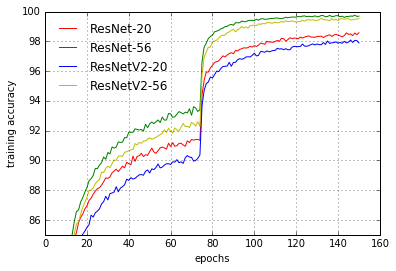

In [5]:
for i in range(4):
    pl.plot(train_epoch_progress[i], train_acc_progress[i], colors[i], label=labels[i])
pl.legend(framealpha=0, loc=0)
pl.grid()
pl.ylim(85, 100)
pl.xlabel('epochs')
pl.ylabel('training accuracy')

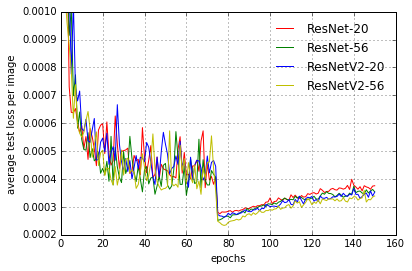

In [6]:
for i in range(4):
    pl.plot(train_epoch_progress[i], test_loss_progress[i], colors[i], label=labels[i])
pl.legend(framealpha=0, loc=0)
pl.grid()
pl.ylim(0.0002, 0.0010)
pl.xlabel('epochs')
pl.ylabel('average test loss per image')

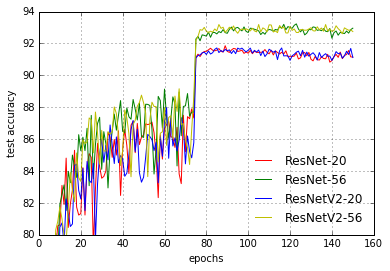

In [7]:
for i in range(4):
    pl.plot(train_epoch_progress[i], test_acc_progress[i], colors[i], label=labels[i])
pl.legend(framealpha=0, loc=0)
pl.grid()
pl.ylim(80, 94)
pl.xlabel('epochs')
pl.ylabel('test accuracy')

In [8]:
for i in range(4):
    print labels[i], avg_epoch_time[i], total_train_time[i]

ResNet-20 20.2029648558 3030.44472837
ResNet-56 53.5598316526 8033.9747479
ResNetV2-20 19.9980683883 2999.71025825
ResNetV2-56 52.9194531361 7937.91797042
